In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

# House and Price Prediction
# this dataset has :
- columns : 21

- rows : 21613

retreving dataset from csv file and convert it to pandas DATAFRAME


In [2]:
# House and Price Prediction
house = pd.read_csv("./housePractice.csv")
print(f"Data Shape: {house.shape}")
house.head(30)

Data Shape: (21613, 21)


id             date      price  bedrooms  bathrooms  sqft_living  \
0   7129300520  20141013T000000   221900.0         3       1.00         1180   
1   6414100192  20141209T000000   538000.0         3       2.25         2570   
2   5631500400  20150225T000000   180000.0         2       1.00          770   
3   2487200875  20141209T000000   604000.0         4       3.00         1960   
4   1954400510  20150218T000000   510000.0         3       2.00         1680   
5   7237550310  20140512T000000  1225000.0         4       4.50         5420   
6   1321400060  20140627T000000   257500.0         3       2.25         1715   
7   2008000270  20150115T000000   291850.0         3       1.50         1060   
8   2414600126  20150415T000000   229500.0         3       1.00         1780   
9   3793500160  20150312T000000   323000.0         3       2.50         1890   
10  1736800520  20150403T000000   662500.0         3       2.50         3560   
11  9212900260  20140527T000000   468000.0         2       1.00         1160   
12   114101516  20140528T000000   310000.0         3       1.00         1430   
13  6054650070  20141007T000000   400000.0         3       1.75         1370   
14  1175000570  20150312T000000   530000.0         5       2.00         1810   
15  9297300055  20150124T000000   650000.0         4       3.00         2950   
16  1875500060  20140731T000000   395000.0         3       2.00         1890   
17  6865200140  20140529T000000   485000.0         4       1.00         1600   
18    16000397  20141205T000000   189000.0         2       1.00         1200   
19  7983200060  20150424T000000   230000.0         3       1.00         1250   
20  6300500875  20140514T000000   385000.0         4       1.75         1620   
21  2524049179  20140826T000000  2000000.0         3       2.75         3050   
22  7137970340  20140703T000000   285000.0         5       2.50         2270   
23  8091400200  20140516T000000   252700.0         2       1.50         1070   
24  3814700200  20141120T000000   329000.0         3       2.25         2450   
25  1202000200  20141103T000000   233000.0         3       2.00         1710   
26  1794500383  20140626T000000   937000.0         3       1.75         2450   
27  3303700376  20141201T000000   667000.0         3       1.00         1400   
28  5101402488  20140624T000000   438000.0         3       1.75         1520   
29  1873100390  20150302T000000   719000.0         4       2.50         2570   

    sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0       5650     1.0           0     0  ...      7        1180              0   
1       7242     2.0           0     0  ...      7        2170            400   
2      10000     1.0           0     0  ...      6         770              0   
3       5000     1.0           0     0  ...      7        1050            910   
4       8080     1.0           0     0  ...      8        1680              0   
5     101930     1.0           0     0  ...     11        3890           1530   
6       6819     2.0           0     0  ...      7        1715              0   
7       9711     1.0           0     0  ...      7        1060              0   
8       7470     1.0           0     0  ...      7        1050            730   
9       6560     2.0           0     0  ...      7        1890              0   
10      9796     1.0           0     0  ...      8        1860           1700   
11      6000     1.0           0     0  ...      7         860            300   
12     19901     1.5           0     0  ...      7        1430              0   
13      9680     1.0           0     0  ...      7        1370              0   
14      4850     1.5           0     0  ...      7        1810              0   
15      5000     2.0           0     3  ...      9        1980            970   
16     14040     2.0           0     0  ...      7        1890              0   
17      4300     1.5           0     0  ...      7        1600           

# lets minimize the number of column and keep the interesting ones

In [3]:
house_df = house[[ 'price' , 'bedrooms' ,'bathrooms' ,'sqft_living' , 'floors' ,'grade', 'sqft_living15' , 'yr_built',  ]]
print(f"Data Shape: {house_df.shape}")
house_df.head(30)

Data Shape: (21613, 8)


price  bedrooms  bathrooms  sqft_living  floors  grade  sqft_living15  \
0    221900.0         3       1.00         1180     1.0      7           1340   
1    538000.0         3       2.25         2570     2.0      7           1690   
2    180000.0         2       1.00          770     1.0      6           2720   
3    604000.0         4       3.00         1960     1.0      7           1360   
4    510000.0         3       2.00         1680     1.0      8           1800   
5   1225000.0         4       4.50         5420     1.0     11           4760   
6    257500.0         3       2.25         1715     2.0      7           2238   
7    291850.0         3       1.50         1060     1.0      7           1650   
8    229500.0         3       1.00         1780     1.0      7           1780   
9    323000.0         3       2.50         1890     2.0      7           2390   
10   662500.0         3       2.50         3560     1.0      8           2210   
11   468000.0         2       1.00         1160     1.0      7           1330   
12   310000.0         3       1.00         1430     1.5      7           1780   
13   400000.0         3       1.75         1370     1.0      7           1370   
14   530000.0         5       2.00         1810     1.5      7           1360   
15   650000.0         4       3.00         2950     2.0      9           2140   
16   395000.0         3       2.00         1890     2.0      7           1890   
17   485000.0         4       1.00         1600     1.5      7           1610   
18   189000.0         2       1.00         1200     1.0      7           1060   
19   230000.0         3       1.00         1250     1.0      7           1280   
20   385000.0         4       1.75         1620     1.0      7           1400   
21  2000000.0         3       2.75         3050     1.0      9           4110   
22   285000.0         5       2.50         2270     2.0      8           2240   
23   252700.0         2       1.50         1070     1.0      7           1220   
24   329000.0         3       2.25         2450     2.0      8           2200   
25   233000.0         3       2.00         1710     1.5      6           1030   
26   937000.0         3       1.75         2450     2.0      8           1760   
27   667000.0         3       1.00         1400     1.5      8           1860   
28   438000.0         3       1.75         1520     1.0      7           1520   
29   719000.0         4       2.50         2570     2.0      8           2630   

    yr_built  
0       1955  
1       1951  
2       1933  
3       1965  
4       1987  
5       2001  
6       1995  
7       1963  
8       1960  
9       2003  
10      1965  
11      1942  
12      1927  
13      1977  
14      1900  
15      1979  
16      1994  
17      1916  
18      1921  
19      1969  
20      1947  
21      1968  
22      1995  
23      1985  
24      1985  
25      1941  
26      1915  
27      1909  
28      1948  
29      2005

# now lets see some info about the data set that could be interesting:

In [4]:
house_df.describe()

price      bedrooms     bathrooms   sqft_living        floors  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   5.400881e+05      3.370842      2.114757   2079.899736      1.494309   
std    3.671272e+05      0.930062      0.770163    918.440897      0.539989   
min    7.500000e+04      0.000000      0.000000    290.000000      1.000000   
25%    3.219500e+05      3.000000      1.750000   1427.000000      1.000000   
50%    4.500000e+05      3.000000      2.250000   1910.000000      1.500000   
75%    6.450000e+05      4.000000      2.500000   2550.000000      2.000000   
max    7.700000e+06     33.000000      8.000000  13540.000000      3.500000   

              grade  sqft_living15      yr_built  
count  21613.000000   21613.000000  21613.000000  
mean       7.656873    1986.552492   1971.005136  
std        1.175459     685.391304     29.373411  
min        1.000000     399.000000   1900.000000  
25%        7.000000    1490.000000   1951.000000  
50%        7.000000    1840.000000   1975.000000  
75%        8.000000    2360.000000   1997.000000  
max       13.000000    6210.000000   2015.000000

# Now let's visualize the data:

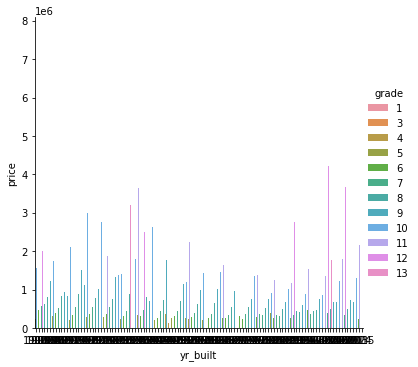

In [5]:
sns.catplot(data=house_df, kind="bar", x="yr_built", y="price", hue="grade" , ci=None )

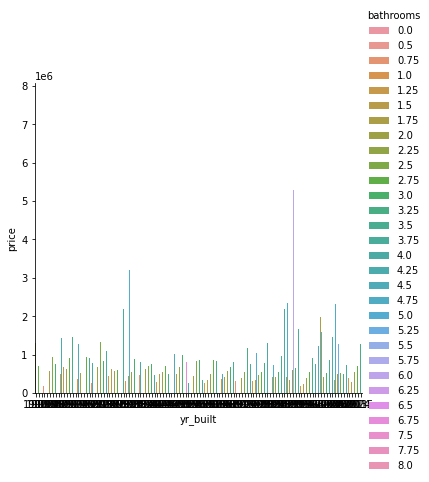

In [6]:
sns.catplot(data=house_df, kind="bar", x="yr_built", y="price", hue="bathrooms" , ci=None )

In [7]:
sns.displot(data=house_df, x="total_bill", col="time", kde=True)

ValueError: Could not interpret value `total_bill` for parameter `x`

sns.pairplot(house_df ,  hue='floors')
plt.show()

In [140]:
# as the data shows .. it seems like there is a linear realtion between price and grade .. let's test it

array([7, 7, 6, ..., 7, 8, 7])

In [141]:
import numpy as np
X = house_df['grade'].values
y = house_df['price'].values
ln_Y = np.log(y)
X

In [142]:
X=X.reshape(-1,1)


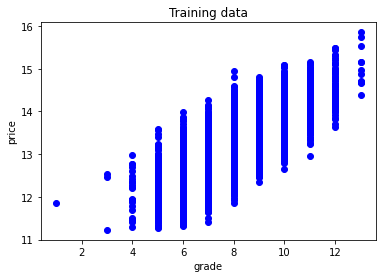

In [143]:
x_train, x_test, y_train, y_test = train_test_split(X,ln_Y,train_size=0.8,test_size=0.2,random_state=100)

In [144]:
%matplotlib inline
plt.scatter(x_train,y_train,color='blue')
plt.xlabel('grade')
plt.ylabel('price')
plt.title('Training data')
plt.show()

Train accuracy 49.49 %
Test accuracy 49.59 %


lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

In [145]:
#  it is not that good .. so let't try adding some factors

<ipython-input-145-4b07342e0b7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_df["log_price"] = log_price


price  bedrooms  bathrooms  sqft_living  floors  grade  \
0      221900.0         3       1.00         1180     1.0      7   
1      538000.0         3       2.25         2570     2.0      7   
2      180000.0         2       1.00          770     1.0      6   
3      604000.0         4       3.00         1960     1.0      7   
4      510000.0         3       2.00         1680     1.0      8   
...         ...       ...        ...          ...     ...    ...   
21608  360000.0         3       2.50         1530     3.0      8   
21609  400000.0         4       2.50         2310     2.0      8   
21610  402101.0         2       0.75         1020     2.0      7   
21611  400000.0         3       2.50         1600     2.0      8   
21612  325000.0         2       0.75         1020     2.0      7   

       sqft_living15  yr_built  log_price  
0               1340      1955  12.309982  
1               1690      1951  13.195614  
2               2720      1933  12.100712  
3               1360      1965  13.311329  
4               1800      1987  13.142166  
...              ...       ...        ...  
21608           1530      2009  12.793859  
21609           1830      2014  12.899220  
21610           1020      2009  12.904459  
21611           1410      2004  12.899220  
21612           1020      2008  12.691580  

[21613 rows x 9 columns]

In [146]:
log_price = np.log(house_df["price"])
house_df["log_price"] = log_price
house_df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   grade          21613 non-null  int64  
 6   sqft_living15  21613 non-null  int64  
 7   yr_built       21613 non-null  int64  
 8   log_price      21613 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 1.5 MB


In [161]:
house_df.info()

In [172]:

data_cleaned = house_df.drop("yr_built",axis=1)
cols = ['log_price','sqft_living', 'floors', 'grade']  
data_preprocessed = data_cleaned[cols]
target = data_preprocessed["log_price"]  
inputs = data_preprocessed.drop("log_price",axis=1)

StandardScaler()

In [173]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

inputs_scaled = scaler.transform(inputs)


In [174]:
# Train and Test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=31)

In [175]:
# Create the Regression¶


LinearRegression()

In [176]:
reg = LinearRegression()
reg.fit(x_train,y_train)

array([12.81929842, 12.81651095, 13.24354757, ..., 14.06490394,
       12.90511126, 13.39040527])

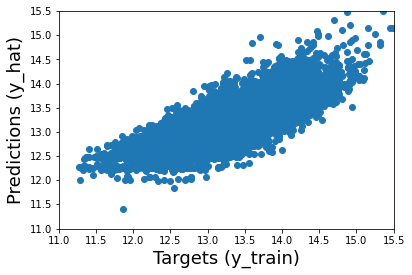

In [177]:
y_hat = reg.predict(x_train)
y_hat

In [178]:
plt.scatter(y_train, y_hat)
plt.xlabel("Targets (y_train)", size=18)
plt.ylabel("Predictions (y_hat)", size=18)
plt.xlim(11,15.5)
plt.ylim(11,15.5)
plt.show()

0.5541925785532678

In [179]:
reg.score(x_train, y_train)

LinearRegression()

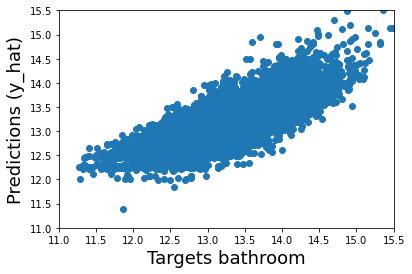

In [180]:
from sklearn import linear_model
clf = linear_model.PoissonRegressor()
# X = [[1, 2], [2, 3], [3, 4], [4, 3]]
# >>> y = [12, 17, 22, 21]
X = house_df['bathrooms']
y = house_df['price']

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=31)

reg = LinearRegression()
reg.fit(x_train,y_train)



In [181]:
plt.scatter(y_train, y_hat)
plt.xlabel("Targets bathroom", size=18)
plt.ylabel("Predictions (y_hat)", size=18)
plt.xlim(11,15.5)
plt.ylim(11,15.5)
plt.show()

0.5541925785532678

reg.score(x_train, y_train)